In [89]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('../Dataset/Dataset/processed.csv')
data.head()

,Unnamed: 0,Gender,Religion_ID,Designation_ID,Status,Employment_Category,Year_of_Birth,ages_in_the_company,reported,Marital_Status_Married,Marital_Status_Single,Employment_Type_Contarct Basis,Employment_Type_Permanant
0,0,1,1,24,1,2,1965.0,29.084932,0,1.0,0.0,0.0,1.0
1,1,1,1,24,1,2,1973.0,27.821918,0,1.0,0.0,0.0,1.0
2,2,1,1,23,0,2,1974.0,33.441096,0,1.0,0.0,0.0,1.0
3,3,0,4,40,0,2,1974.0,22.350685,0,1.0,0.0,0.0,1.0
4,4,1,1,7,1,2,1980.0,21.945205,0,1.0,0.0,0.0,1.0


In [90]:
# remove unnamed column
data.drop(data.columns[0], axis=1, inplace=True)

In [91]:
data.head()

,Gender,Religion_ID,Designation_ID,Status,Employment_Category,Year_of_Birth,ages_in_the_company,reported,Marital_Status_Married,Marital_Status_Single,Employment_Type_Contarct Basis,Employment_Type_Permanant
0,1,1,24,1,2,1965.0,29.084932,0,1.0,0.0,0.0,1.0
1,1,1,24,1,2,1973.0,27.821918,0,1.0,0.0,0.0,1.0
2,1,1,23,0,2,1974.0,33.441096,0,1.0,0.0,0.0,1.0
3,0,4,40,0,2,1974.0,22.350685,0,1.0,0.0,0.0,1.0
4,1,1,7,1,2,1980.0,21.945205,0,1.0,0.0,0.0,1.0


load previous data set


In [92]:
data_org = pd.read_csv('../Dataset/Dataset/employees.csv')
data_org.head()  

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980


In [93]:
# drop Marital_Status_Married , Marital_Status_Single columns from data and merge Marital_Status column in data_org to data 
data.drop(['Marital_Status_Married', 'Marital_Status_Single'], axis=1, inplace=True)
data = pd.concat([data, data_org['Marital_Status']], axis=1)
data.head()

,Gender,Religion_ID,Designation_ID,Status,Employment_Category,Year_of_Birth,ages_in_the_company,reported,Employment_Type_Contarct Basis,Employment_Type_Permanant,Marital_Status
0,1,1,24,1,2,1965.0,29.084932,0,0.0,1.0,Married
1,1,1,24,1,2,1973.0,27.821918,0,0.0,1.0,Married
2,1,1,23,0,2,1974.0,33.441096,0,0.0,1.0,Married
3,0,4,40,0,2,1974.0,22.350685,0,0.0,1.0,Married
4,1,1,7,1,2,1980.0,21.945205,0,0.0,1.0,Married


In [94]:
# map Marital_Status to if unmarried 0 and married -1
data['Marital_Status'] = data['Marital_Status'].map({'Married': 1, 'Single': 0})

In [95]:
# get a copy from data
data_copy = data.copy()

 Drop rows with missing values in Marital_Status during training

In [96]:
# Drop rows with missing values in Marital_Status during training
data_train = data.dropna(subset=['Marital_Status'])

In [97]:
data_train.isnull().sum()

Gender                            0
Religion_ID                       0
Designation_ID                    0
Status                            0
Employment_Category               0
Year_of_Birth                     0
ages_in_the_company               0
reported                          0
Employment_Type_Contarct Basis    0
Employment_Type_Permanant         0
Marital_Status                    0
dtype: int64

Separate features (X) and target variable (y)

In [98]:
data_train.head()

,Gender,Religion_ID,Designation_ID,Status,Employment_Category,Year_of_Birth,ages_in_the_company,reported,Employment_Type_Contarct Basis,Employment_Type_Permanant,Marital_Status
0,1,1,24,1,2,1965.0,29.084932,0,0.0,1.0,1.0
1,1,1,24,1,2,1973.0,27.821918,0,0.0,1.0,1.0
2,1,1,23,0,2,1974.0,33.441096,0,0.0,1.0,1.0
3,0,4,40,0,2,1974.0,22.350685,0,0.0,1.0,1.0
4,1,1,7,1,2,1980.0,21.945205,0,0.0,1.0,1.0


In [99]:
# Separate features (X) and target variable (y)
X = data_train.drop('Marital_Status', axis=1)
y = data_train['Marital_Status']


In [100]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((744, 10), (186, 10), (744,), (186,))

In [102]:
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')

In [103]:
model.fit(X_train, y_train)

0:	learn: 0.6521159	total: 1.6ms	remaining: 159ms
1:	learn: 0.6180171	total: 3.36ms	remaining: 164ms
2:	learn: 0.5899569	total: 4.73ms	remaining: 153ms
3:	learn: 0.5661912	total: 6.07ms	remaining: 146ms
4:	learn: 0.5425321	total: 7.59ms	remaining: 144ms
5:	learn: 0.5191862	total: 8.96ms	remaining: 140ms
6:	learn: 0.5018881	total: 11.3ms	remaining: 150ms
7:	learn: 0.4858254	total: 13.4ms	remaining: 154ms
8:	learn: 0.4725567	total: 14.3ms	remaining: 145ms
9:	learn: 0.4596320	total: 15ms	remaining: 135ms
10:	learn: 0.4475029	total: 16.2ms	remaining: 131ms
11:	learn: 0.4360434	total: 17.2ms	remaining: 126ms
12:	learn: 0.4274093	total: 18.4ms	remaining: 123ms
13:	learn: 0.4195968	total: 19.7ms	remaining: 121ms
14:	learn: 0.4121685	total: 20.9ms	remaining: 119ms
15:	learn: 0.4047592	total: 21.8ms	remaining: 114ms
16:	learn: 0.3998032	total: 22.4ms	remaining: 110ms
17:	learn: 0.3934889	total: 23.7ms	remaining: 108ms
18:	learn: 0.3880053	total: 25.6ms	remaining: 109ms
19:	learn: 0.3835683	tota

In [104]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Generate classification report for the best model
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

         0.0       0.77      0.76      0.76        62
         1.0       0.88      0.89      0.88       124

    accuracy                           0.84       186
   macro avg       0.83      0.82      0.82       186
weighted avg       0.84      0.84      0.84       186



In [105]:
# Train XGboost classifier for this 
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb:.2f}')
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.83
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75        62
         1.0       0.87      0.88      0.88       124

    accuracy                           0.83       186
   macro avg       0.81      0.81      0.81       186
weighted avg       0.83      0.83      0.83       186



In [106]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Define the XGBoost classifier
# model_xgb = XGBClassifier()

# # Define the hyperparameters grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Perform hyperparameter tuning
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Predict with the best model
# y_pred_best = best_model.predict(X_test)

# # Calculate accuracy
# accuracy_best = accuracy_score(y_test, y_pred_best)

# # Print the accuracy and classification report
# print(f'Best Model Accuracy: {accuracy_best:.2f}')
# print(classification_report(y_test, y_pred_best))


In [107]:
# train simple neural network for this classification problem 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# before add to model noramalizing or min max sclaed  data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')



Epoch 1/50


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5054 - loss: 0.6887 - val_accuracy: 0.8065 - val_loss: 0.4539
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8065 - loss: 0.4296 - val_accuracy: 0.8548 - val_loss: 0.3291
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8446 - loss: 0.3728 - val_accuracy: 0.8656 - val_loss: 0.3114
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - loss: 0.3367 - val_accuracy: 0.8656 - val_loss: 0.3025
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8689 - loss: 0.3481 - val_accuracy: 0.8710 - val_loss: 0.3000
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3218 - val_accuracy: 0.8871 - val_loss: 0.2945
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3388 - val_accuracy: 0.8656 - val_loss: 0.2997
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8615 - loss: 0.3351 - val_accuracy: 0.8710 - val_loss: 0.2991
Epo

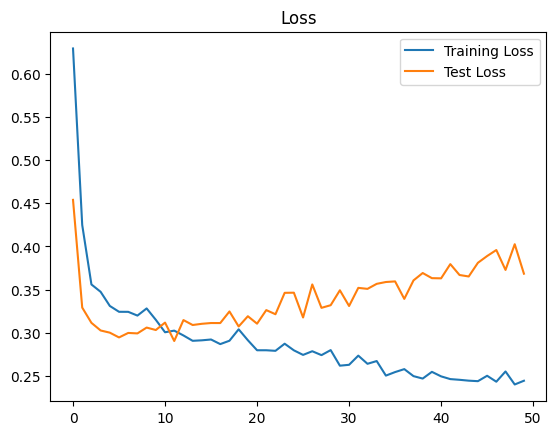

In [108]:
# plot trainning history
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create accuracy subplots
plt.figure()
plt.plot(training_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss')
plt.legend()
